### Imports

In [7]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# files in mnist
os.listdir('../mnist-in-csv/')

['mnist_test.csv', 'mnist_train.csv']

In [12]:
# dataset
training_data = pd.read_csv('../mnist-in-csv/mnist_train.csv')
test_data = pd.read_csv('../mnist-in-csv/mnist_test.csv')

In [62]:
# Training Data
X_train = training_data.drop('label', axis=1).values
# normalize x train data
X_train = (X_train/255).astype('float32')
Y_label = training_data['label'].values
# one hot encoding for 10 classes 
Y_train = np.eye(np.max(Y_label)+1)[Y_label].astype('float32')

# Testing data
X_test = test_data.drop('label', axis=1).values
# normalize x test data
X_test = (X_test/255).astype('float32')
Y_test_label = test_data['label'].values
# one hot encoding for 10 classes 
Y_test = np.eye(np.max(Y_test_label)+1)[Y_test_label].astype('float32')

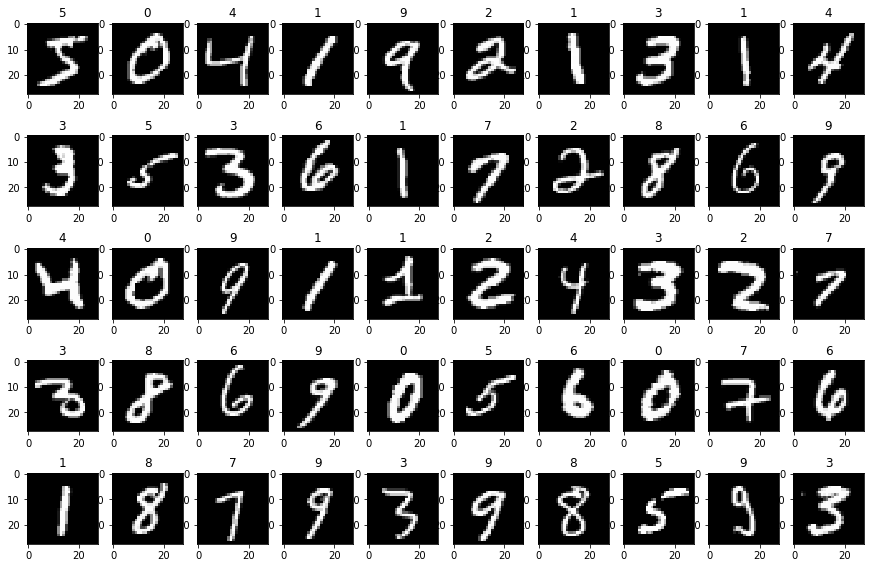

In [63]:
# plot
plt.figure(figsize=(15,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.title('{label}'.format(label=Y_label[i]))
    plt.imshow(X_train[i].reshape((28,28)), cmap='gray')

In [64]:
# info
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)
print('X_train dtype ', X_train.dtype)
print('Y_train dtype: ', Y_train.dtype)
print('X_test dtype ', X_test.dtype)
print('Y_test dtype: ', Y_test.dtype)

X_train shape:  (60000, 784)
Y_train shape:  (60000, 10)
X_test shape:  (10000, 784)
Y_test shape:  (10000, 10)
X_train dtype  float32
Y_train dtype:  float32
X_test dtype  float32
Y_test dtype:  float32


### placeholders

In [65]:
# create placeholders to keep our data to train

X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

In [66]:
# create filters for both convolution layer as variable

W1 = tf.Variable(tf.truncated_normal([5,5,1,32]), dtype=tf.float32)
W2 = tf.Variable(tf.truncated_normal([5,5,32,64]), dtype=tf.float32)

### Layers

In [69]:
x = tf.reshape(X, [-1,28,28,1])

In [70]:
## First convolution layer

Z1 = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding='SAME')
A1 = tf.nn.relu(Z1)
P1 = tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [72]:
## Second convolution layer

Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding='SAME')
A2 = tf.nn.relu(Z2)
P2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [77]:
## flatten 
P2 = tf.contrib.layers.flatten(P2)

## fully connected network

Z3 = tf.contrib.layers.fully_connected(P2, 10, activation_fn=None)

### cost

In [79]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Z3))

In [81]:
learning_rate = 0.009
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(cost)

In [87]:
[train, cost]

[<tf.Operation 'Adam' type=NoOp>,
 <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]

In [83]:
init = tf.global_variables_initializer()

### Session

In [85]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(100):
        _, temp_cost = sess.run(train, feed_dict={X: X_train[:1000], Y: Y_train[:1000]})
    
    if epoch%5 == 0:
        print("Cost after epoch %i: %f" % (epoch, temp_cost))
    
    

TypeError: 'NoneType' object is not iterable